# Проект по моделям машинного обучения с учителем (supervised learning) - Методы на основе деревьев


## ЦЕЛЬ: Создать модель предсказания того, уйдёт ли абонент в отток (churn).


## Выполните задания ниже, обозначенные жирным шрифтом!

## Часть 0: Импортируем библиотеки и загружаем данные

**Задание: Запустите уже готовые ячейки ниже, чтобы импортировать библиотеки и загрузить данные из файла в датафрейм. Файл называется "Telco-Customer-Churn.csv"**

In [1]:
# Запустите эти ячейки для начала выполнения проекта!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Часть 1: Общие характеристики данных

**Задание: С помощью метода .info() проверьте типы данных для колонок, а также есть ли отсутствующие значения в Вашем датафрейме.**

In [5]:
# Напишите Ваш код в этой ячейке
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Задание: Выведите статистические метрики для числовых колонок с помощью .describe(). Вы увидите, что большинство колонок являются категориальными, поэтому Вам позднее нужно будет создать для них дамми-переменные.**

In [6]:
# Напишите Ваш код в этой ячейке
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Часть 2:  Исследование данных (Exploratory Data Analysis)

## Исследование признаков

**Задание: Проверьте, что в этих данных нет отсутствующих значений - для этого выведите количество значений NaN отдельно для каждой колонки.**

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Задание: Постройте график CountPlot для проверки сбалансированности значений колонки с классами (Churn).**

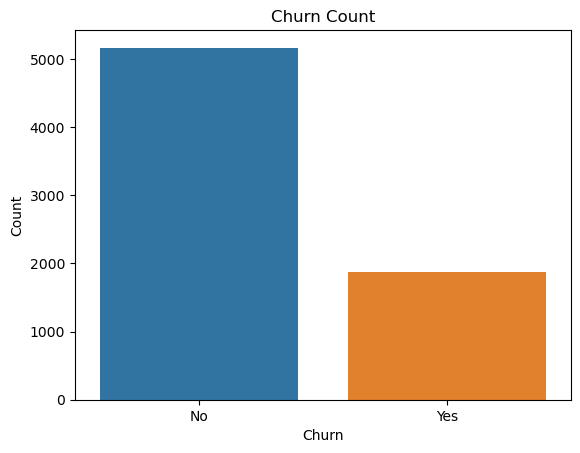

In [9]:
# Напишите Ваш код в этой ячейке
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)

plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Count')

plt.show()


**Задание: Исследуйте распределение колонки TotalCharges по различным категориям Churn с помощью графика Box Plot или Violin Plot.**

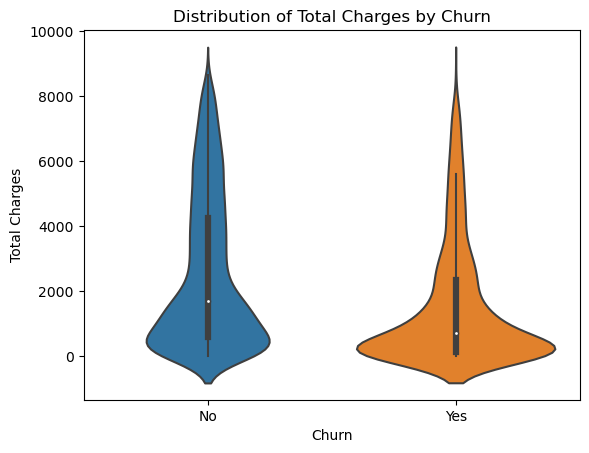

In [10]:
# Напишите Ваш код в этой ячейке
# Построение Violin Plot
sns.violinplot(x='Churn', y='TotalCharges', data=df)

plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.title('Distribution of Total Charges by Churn')

plt.show()


**Задание: Постройте график boxplot с распределением колонки TotalCharges для различных типов контрактов, а также добавьте раскраску цветами по колонке Churn.**

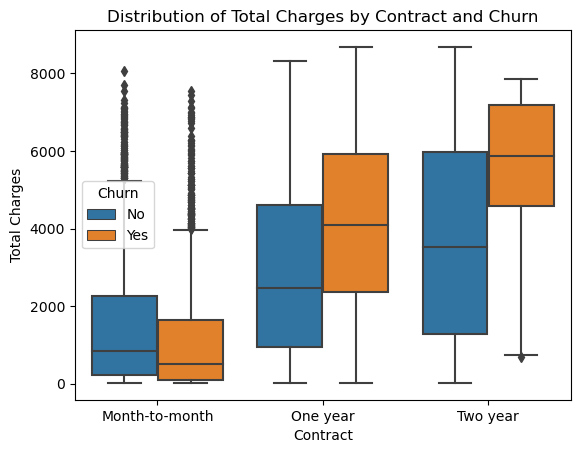

In [11]:
# Напишите Ваш код в этой ячейке
sns.boxplot(x='Contract', y='TotalCharges', hue='Churn', data=df)

plt.xlabel('Contract')
plt.ylabel('Total Charges')
plt.title('Distribution of Total Charges by Contract and Churn')

plt.legend(title='Churn', loc='best')

plt.show()

**Задание: Постройте график barplot с корреляции указанных ниже признаков с целевой переменной. Обратите внимание, что для категориальных признаков сначала нужно сконвертировать их в дамми-переменные, потому что корреляция вычисляется только для числовых колонок.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Приведен список признаков, чтобы не проверять все признаки. Дело в том, что некоторые признаки имеют слишком много уникальных значений для такого анализа, например колонка customerID.***

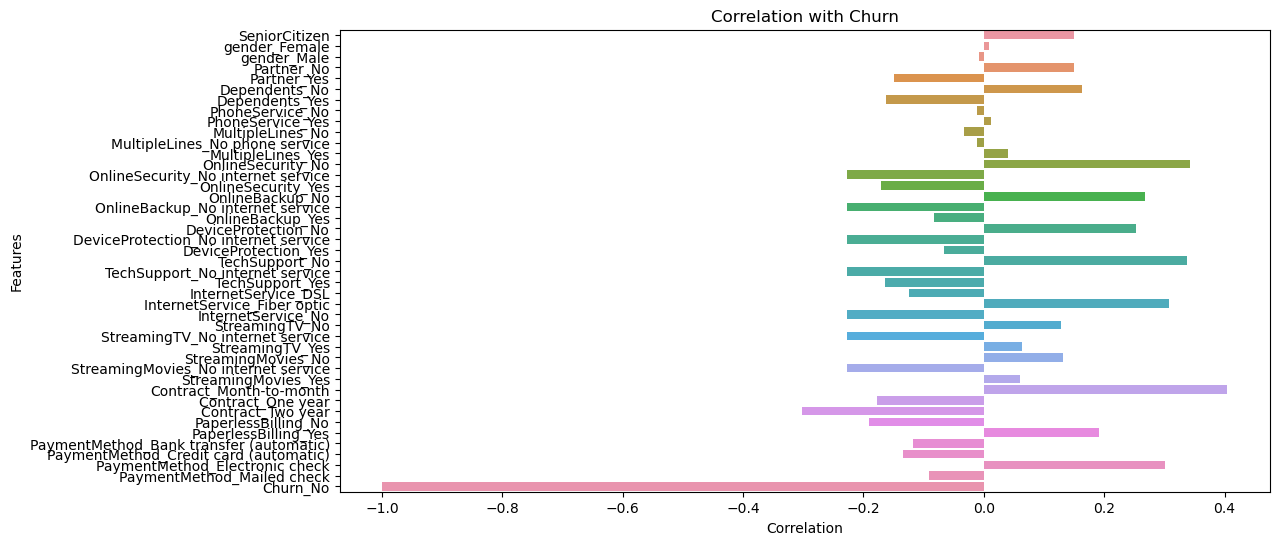

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'InternetService', 'StreamingTV', 'StreamingMovies',
                 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
df_selected = df[selected_cols]

df_dummies = pd.get_dummies(df_selected)

correlation = df_dummies.corr()['Churn_Yes']

correlation = correlation.drop('Churn_Yes')

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation.values, y=correlation.index, orient='h')

plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlation with Churn')

plt.show()


In [15]:
for feature, corr_value in correlation.iteritems():
    print(f"{feature.ljust(40)} {corr_value:.6f}")

SeniorCitizen                            0.150541
gender_Female                            0.008545
gender_Male                              -0.008545
Partner_No                               0.149982
Partner_Yes                              -0.149982
Dependents_No                            0.163128
Dependents_Yes                           -0.163128
PhoneService_No                          -0.011691
PhoneService_Yes                         0.011691
MultipleLines_No                         -0.032654
MultipleLines_No phone service           -0.011691
MultipleLines_Yes                        0.040033
OnlineSecurity_No                        0.342235
OnlineSecurity_No internet service       -0.227578
OnlineSecurity_Yes                       -0.171270
OnlineBackup_No                          0.267595
OnlineBackup_No internet service         -0.227578
OnlineBackup_Yes                         -0.082307
DeviceProtection_No                      0.252056
DeviceProtection_No internet service    

<img src='figbar.png'>

---
---

# Часть 3: Анализ оттока

**В этих заданиях мы выполним сегментацию абонентов на основе колонки tenure, создавая "когорты" и выполняя сравнение данных между различными когортами.**

**Задание: Перечислите 3 типа контракта (колонка Contract).**

In [16]:
# Напишите Ваш код в этой ячейке
contract_types = df['Contract'].unique()
contract_types


array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Задание: Создайте гистограмму с распределением значений колонки tenure - это количество месяцев, сколько времени человек является (или являлся) абонентом компании.**

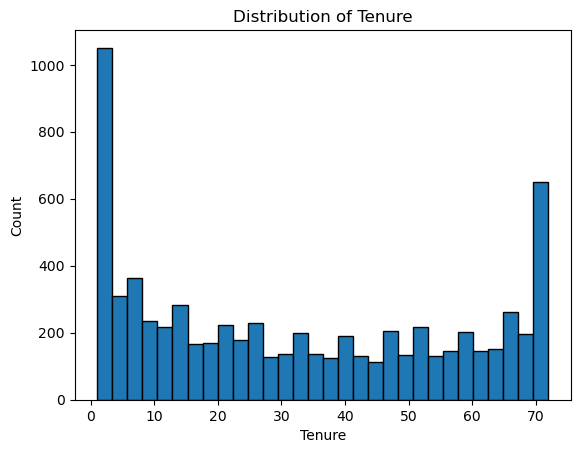

In [17]:
# Напишите Ваш код в этой ячейке
plt.hist(df['tenure'], bins=30, edgecolor='black')

plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Tenure')

plt.show()


<img src="fig5.png">

**Задание: Постройте гистограммы для колонки tenure, разбивая данные по двум колонкам - Churn и Contract. Посмотрите документацию по seaborn или блокноты для раздела про seaborn, чтобы вспомнить, как это делается.**

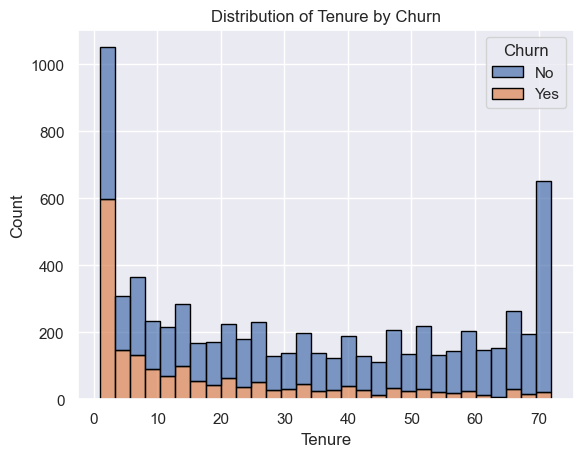

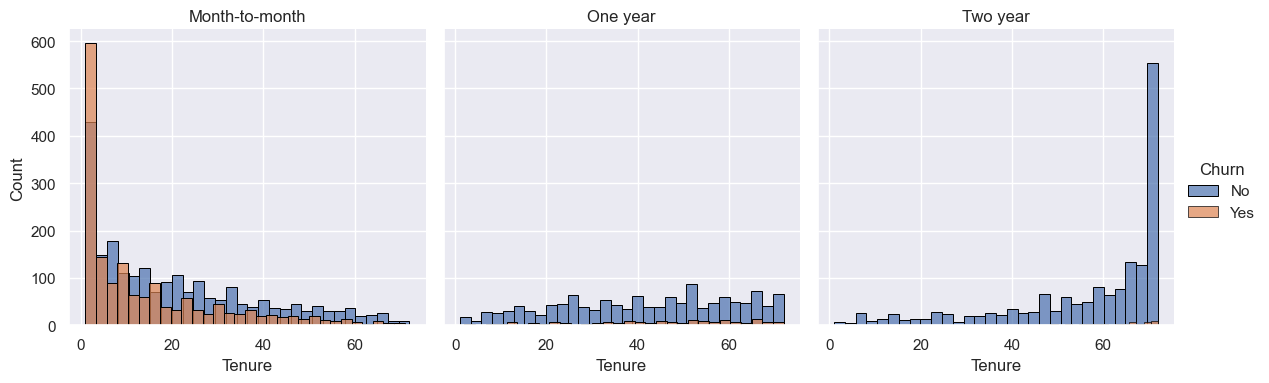

In [19]:
# Напишите Ваш код в этой ячейке
import seaborn as sns
import matplotlib.pyplot as plt

# Настройка стиля графиков seaborn
sns.set(style="darkgrid")

# Построение гистограмм
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Count')

# Создание отдельных графиков для каждого типа контракта
g = sns.FacetGrid(df, col='Contract', hue='Churn', col_wrap=3, height=4)
g.map(sns.histplot, 'tenure', bins=30, edgecolor='black', alpha=0.7)
g.set_titles("{col_name}")
g.set_axis_labels("Tenure", "Count")
g.add_legend()

# Отображение графиков
plt.show()


<img src="fig6.png">

**Задание: Постройте график scatterplot для колонок Total Charges и Monthly Charges, раскрашивая график цветами по колонке Churn.**

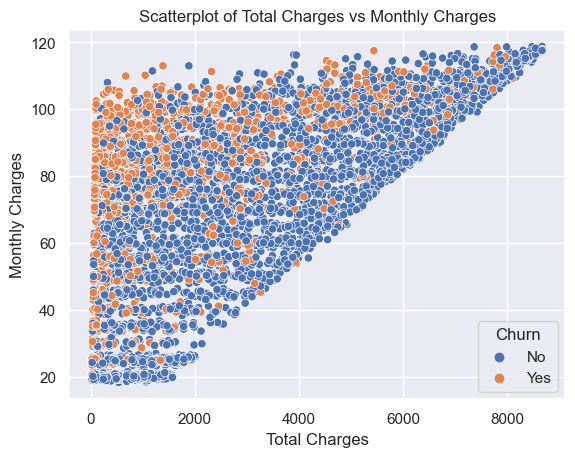

In [20]:
# Напишите Ваш код в этой ячейке
import seaborn as sns
import matplotlib.pyplot as plt

# Настройка стиля графиков seaborn
sns.set(style="darkgrid")

# Построение scatterplot
sns.scatterplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')

# Настройка осей и заголовка графика
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.title('Scatterplot of Total Charges vs Monthly Charges')

# Отображение графика
plt.show()


<img src='fig7.png'>

### Создание когорт (сегментов) по колонке Tenure

**Для начала поместим различные значения tenure (1 месяц, 2 месяца, 3 месяца и так далее) в отдельные когорты (сегменты).**

**Задание: Для каждого уникального значения колонки tenure в качестве когорты, вычислите процент оттока (churn rate) - это количество тех людей, кто ушёл в отток в когорте, как процент от общего количества людей в данной когорте. Вычислите такой процент отдельно для каждой когорты. Например, для когорты с tenure = "1 месяц" должен получиться процент оттока 61.99%. В итоге у Вас должны получиться когорты от 1 до 72 месяцев, и с увеличением количества месяцев уровень оттока должен снижаться. Это разумно, потому что чем дольше человек пользуется услугами компании, тем вероятнее то, что его/её всё устраивает, и он/она продолжит пользоваться этими услугами.**

In [26]:

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

cohorts = df.groupby('tenure')['Churn'].mean() * 100

print(cohorts)



tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Churn, Length: 72, dtype: float64


**Задание: Используя результаты предыдущего задания, постройте график процента оттока для различных значений tenure.**

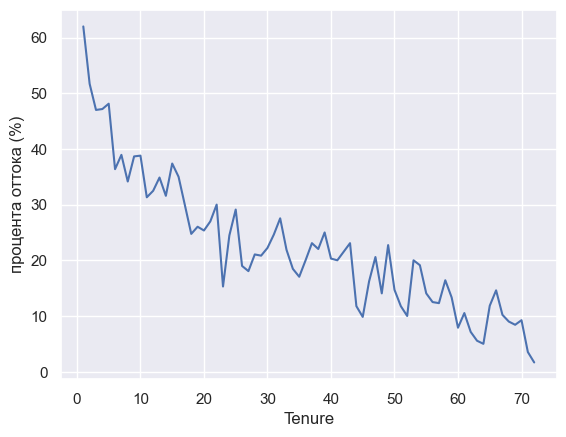

In [27]:
# Напишите Ваш код в этой ячейке

plt.plot(cohorts.index, cohorts.values)
plt.xlabel('Tenure')
plt.ylabel('процента оттока (%)')
plt.show()

<img src='fig9.png'>

### Более крупные когорты (сегменты)
**Задание: На основе колонки tenure создайте новую колонку с названием "Tenure Cohort", в которой будут следующие 4 категории:**
   * '0-12 месяцев'
   * '24-48 месяцев'
   * '12-24 месяцев'
   * 'Более 48 месяцев'    

In [29]:

# Определение границ для категорий
bins = [0, 12, 24, 48, df['tenure'].max()]

# Метки для категорий
labels = ['0-12 месяцев', '12-24 месяцев', '24-48 месяцев', 'Более 48 месяцев']

# Создание новой колонки "Tenure Cohort"
df['Tenure Cohort'] = pd.cut(df['tenure'], bins=bins, labels=labels)

# Вывод первых нескольких строк с новой колонкой
print(df[['tenure', 'Tenure Cohort']].head())


   tenure  Tenure Cohort
0       1   0-12 месяцев
1      34  24-48 месяцев
2       2   0-12 месяцев
3      45  24-48 месяцев
4       2   0-12 месяцев


**Задание: Постройте график scatterplot для Total Charges и Monthly Charts, раскрашивая график разными цветами по колонке "Tenure Cohort", которую Вы создали в предыдущем задании.**

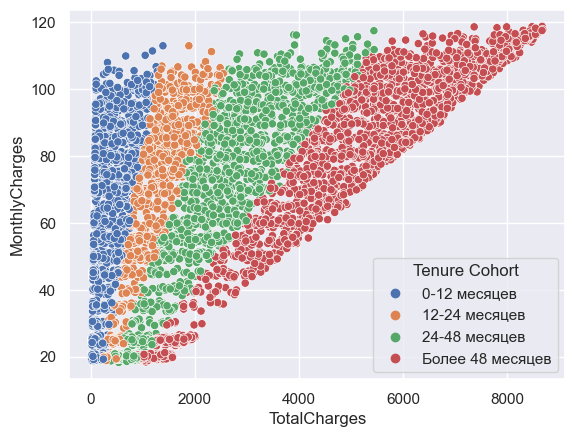

In [30]:
# Напишите Ваш код в этой ячейке
# Построение scatterplot с раскрашиванием по колонке "Tenure Cohort"
sns.scatterplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Tenure Cohort')
# Отображение графика
plt.show()

<img src='fig10.png'>

**Задание: Постройте график countplot с количеством ушедших и не ушедших в отток людей в каждой когорте.**

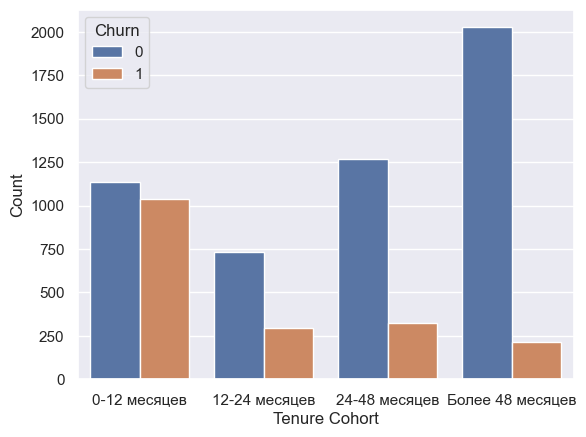

In [31]:
# Напишите Ваш код в этой ячейке
# Построение countplot с количеством ушедших и не ушедших в отток людей в каждой когорте
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')
plt.xlabel('Tenure Cohort')
plt.ylabel('Count')
plt.show()

<img src='cplot.png'>

**Задание: Создайте набор графиков CountPlot с количеством людей по различным когортам Tenure Cohort. Для каждого типа контракта создайте отдельный график, и раскрасьте эти графики разными цветами по колонке Churn.**

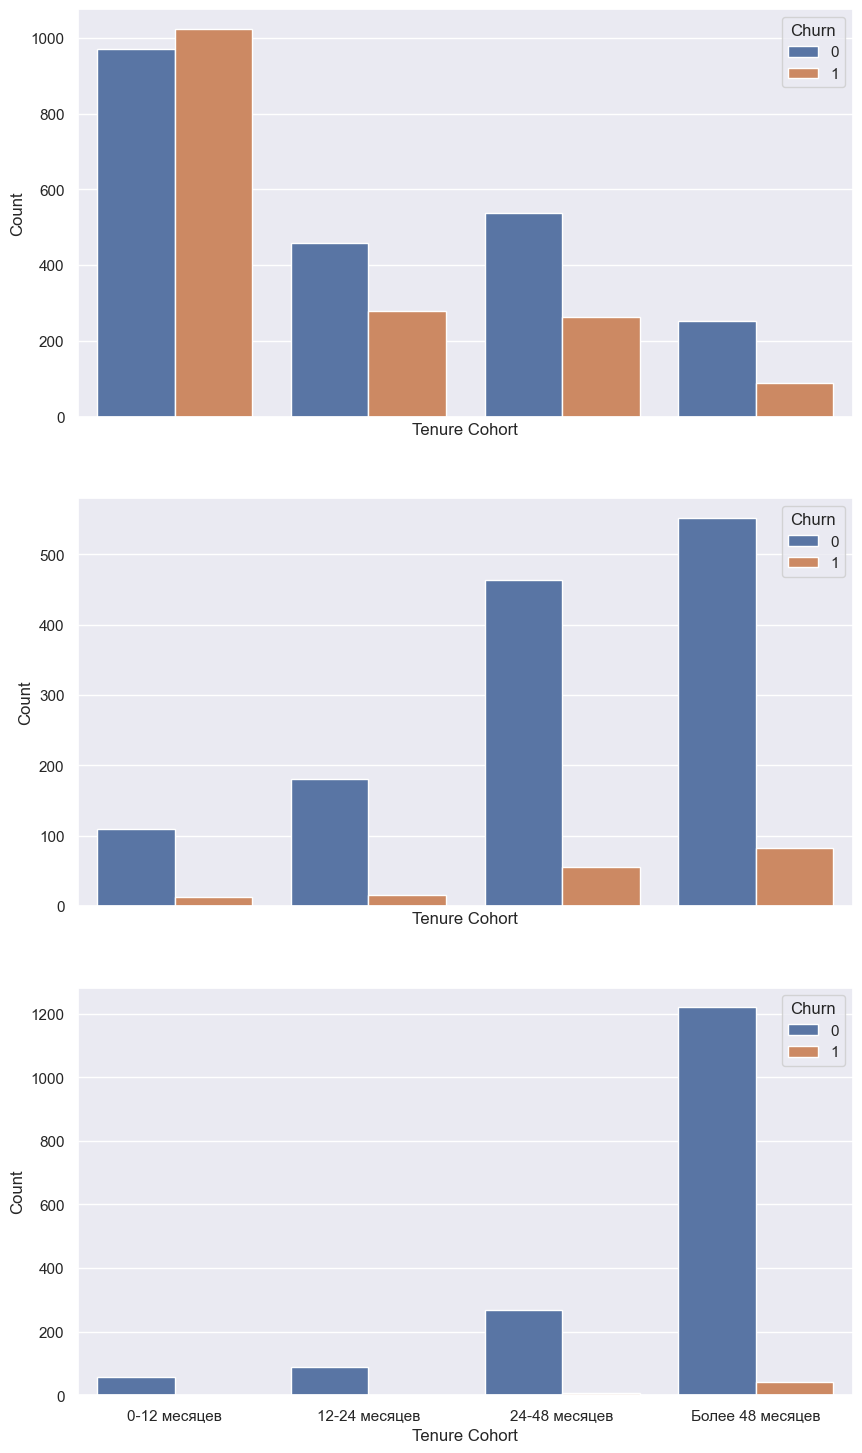

In [32]:
# Напишите Ваш код в этой ячейке
# Напишите Ваш код в этой ячейке
# Получение уникальных типов контрактов
contract_types = df['Contract'].unique()
# Создание набора графиков
fig, axes = plt.subplots(len(contract_types), 1, figsize=(10, 6 * len(contract_types)), sharex=True)
# Цикл по типам контрактов
for i, contract_type in enumerate(contract_types):
    # Фильтрация данных по типу контракта
    subset_data = df[df['Contract'] == contract_type]
    # Построение countplot с количеством людей в каждой когорте для текущего типа контракта
    sns.countplot(data=subset_data, x='Tenure Cohort', hue='Churn', ax=axes[i])
    # Добавление подписи оси y
    axes[i].set_ylabel('Count')
# Отображение графиков
plt.show()

-----

# Часть 4: Предиктивная модель

**Давайте исследуем 4 модели на основе деревьев: одно дерево решений, случайный лес, адаптивный бустинг и градиентный бустинг. При желании Вы можете дополнительно попробовать любые другие модели машинного обучения с учителем (supervised learning models) и сравнить результаты!**


## Одно дерево решений (Decision Tree)

**Задание: Разделите все данные на признаки X и целевую переменную Y. Создайте дамми-переменные, где это необходимо, а также посмотрите, есть ли какие-то признаки, которые можно было бы удалить.**

In [4]:
# Разделение данных на признаки и целевую переменную
X = df.drop('Churn', axis=1)
Y = df['Churn']
# Создание дамми-переменных для категориальных признаков
X = pd.get_dummies(X, sparse=True)

**Задание: Выполните разбиение данных на обучающий и тестовый наборы (train test split), откладывая в сторону 10% данных для тестирования. В решениях мы используем random_state=101.**

In [5]:
# Разбиение данных на обучающий и тестовый наборы
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=101)


**Задание: Постройте модель Decision Tree и оцените её работу. Для этого выполните следующие шаги:**
   1. Обучите модель дерева решений (при желании можете выполнить поиск по сетке для поиска оптимальных значений гиперпараметров).
   2. Оцените метрики работы модели дерева решений - для этого выведите отчёт "classification report" и нарисуйте график с матрицей ошибок (confusion matrix).
   2. Посмотрите на важности признаков для получившегося дерева решений.
   4. Опционально: Нарисуйте график получившегося дерева. Обратите внимание, что если дерево получилось очень большим и Вы не выполняли усечение дерева с помощью параметров, то вызов метода plot_tree может привести к ошибке.

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Создание и обучение модели дерева решений
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
# Предсказание на тестовом наборе
Y_pred = dt.predict(X_test)
# Оценка метрик работы модели
print("Classification Report:")
print(classification_report(Y_test, Y_pred))


C:\Users\invet\anaconda3\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\invet\anaconda3\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.84      0.85       557
         Yes       0.43      0.46      0.45       147

    accuracy                           0.76       704
   macro avg       0.64      0.65      0.65       704
weighted avg       0.77      0.76      0.76       704



In [7]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.84      0.85       557
         Yes       0.43      0.46      0.45       147

    accuracy                           0.76       704
   macro avg       0.64      0.65      0.65       704
weighted avg       0.77      0.76      0.76       704



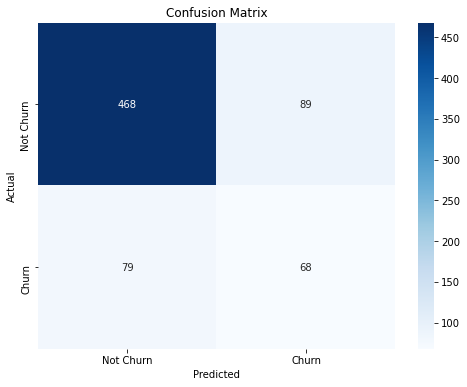

Feature Importances:


In [8]:
# Построение матрицы ошибок
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# Важности признаков
feature_importances = dt.feature_importances_
indices = np.argsort(feature_importances)[::-1]
print("Feature Importances:")

In [9]:
for i, index in enumerate(indices):
    print(f"{i+1}. {X.columns[index]}: {feature_importances[index]}")

1. Contract_Month-to-month: 0.17013934290440044
2. MonthlyCharges: 0.11170197905082088
3. TotalCharges: 0.09481733585489899
4. tenure: 0.0803158049378069
5. InternetService_Fiber optic: 0.05048185866742801
6. SeniorCitizen: 0.01259924897652455
7. TechSupport_No: 0.012585694243653653
8. PaymentMethod_Electronic check: 0.01103866543501372
9. OnlineSecurity_No: 0.00850454421833567
10. gender_Female: 0.0061994230904819075
11. OnlineBackup_No: 0.006091574401128218
12. PaperlessBilling_Yes: 0.005653042846419264
13. Dependents_No: 0.004660597768738794
14. OnlineSecurity_Yes: 0.0046520936979665
15. PaperlessBilling_No: 0.00444954462926488
16. MultipleLines_No: 0.004277028973179363
17. PaymentMethod_Credit card (automatic): 0.0041918971683949854
18. Partner_Yes: 0.003916188208771024
19. StreamingTV_No: 0.0038364311974929282
20. TechSupport_Yes: 0.0034827770485409324
21. StreamingTV_Yes: 0.0033501799688693936
22. Partner_No: 0.003326059153907978
23. Dependents_Yes: 0.00331942057891202
24. Stream

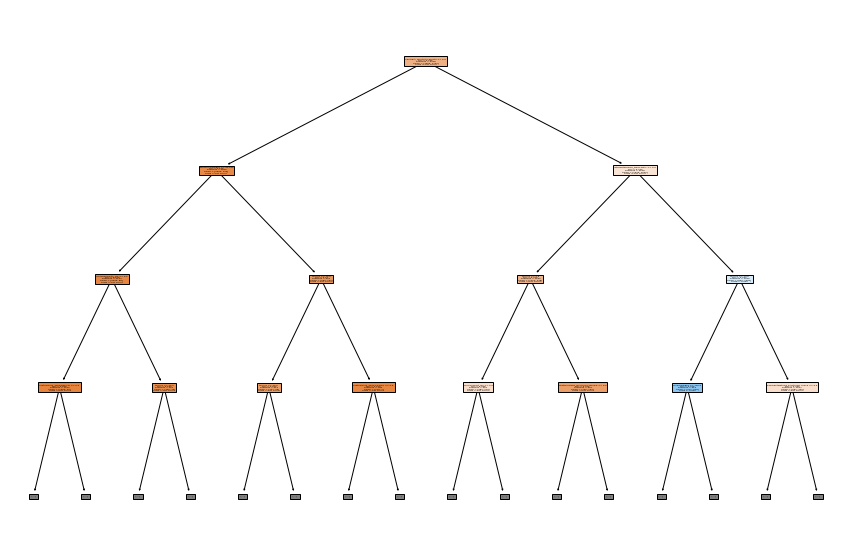

In [13]:
# Оптимизированная визуализация дерева решений
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=["Not Churn", "Churn"], filled=True, max_depth=3)
plt.show()


## Случайный лес (Random Forest)

**Задание: Создайте модель случайного леса, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [15]:
# Создание модели случайного леса
rf = RandomForestClassifier(n_estimators=100, random_state=101)
rf.fit(X_train, Y_train)

# Оценка метрик работы модели
Y_pred = rf.predict(X_test)
print(classification_report(Y_test, Y_pred))



C:\Users\invet\anaconda3\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\invet\anaconda3\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


              precision    recall  f1-score   support

          No       0.86      0.91      0.89       557
         Yes       0.57      0.46      0.51       147

    accuracy                           0.82       704
   macro avg       0.72      0.68      0.70       704
weighted avg       0.80      0.82      0.81       704



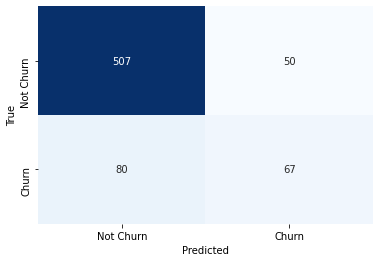

In [21]:
# Визуализация матрицы ошибок
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Расширяемые деревья (Boosted Trees)

**Задание: Создайте модель AdaBoost или Gradient Boosting, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

C:\Users\invet\anaconda3\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\invet\anaconda3\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


AdaBoost Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.91      0.90       557
         Yes       0.62      0.53      0.57       147

    accuracy                           0.83       704
   macro avg       0.75      0.72      0.73       704
weighted avg       0.83      0.83      0.83       704



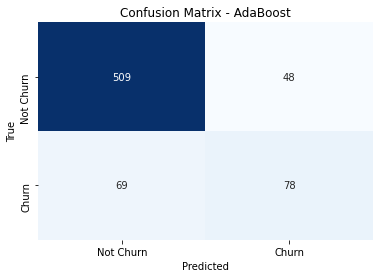

In [22]:
# Напишите Ваш код в этой ячейке
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Создание модели AdaBoost
adaboost = AdaBoostClassifier(n_estimators=100, random_state=101)
adaboost.fit(X_train, Y_train)

# Оценка метрик работы модели AdaBoost
Y_pred_adaboost = adaboost.predict(X_test)
print("AdaBoost Classification Report:")
print(classification_report(Y_test, Y_pred_adaboost))

# Визуализация матрицы ошибок для модели AdaBoost
cm_adaboost = confusion_matrix(Y_test, Y_pred_adaboost)
sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - AdaBoost")
plt.show()



**Задания: Сравнивая результаты, какая модель у Вас работает лучше других?**

In [1]:
# Наилучшие результаты в модели AdaBoostClassifier, 
# однако надо сказать, что не выполнялся поиск по сетке grid search,
# и целом модели показывали очень похожие результаты на этих данных.